# Importing Necessary Libralies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Necessary Data Sets

In [63]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/dim_date.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_makers.csv")
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_state.csv")

# Analysing

In [4]:
j=0
for i in [df1,df2,df3]:
  j+=1
  print(j,"Table")
  print("Null Values \n",i.isna().sum())
  print("Duplicate Values are ",i.duplicated().sum())
  df=pd.concat([i.dtypes,i.head().T],axis=1)
  df.columns = ["Data Types", "Sample_1", "Sample_2", "Sample_3", "Sample_4", "Sample_5"]
  print(df)


1 Table
Null Values 
 date           0
fiscal_year    0
quarter        0
dtype: int64
Duplicate Values are  0
            Data Types   Sample_1   Sample_2   Sample_3   Sample_4   Sample_5
date            object  01-Apr-21  01-May-21  01-Jun-21  01-Jul-21  01-Aug-21
fiscal_year      int64       2022       2022       2022       2022       2022
quarter         object         Q1         Q1         Q1         Q2         Q2
2 Table
Null Values 
 date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64
Duplicate Values are  0
                       Data Types      Sample_1    Sample_2      Sample_3  \
date                       object     01-Apr-21   01-Apr-22     01-May-21   
vehicle_category           object    2-Wheelers  2-Wheelers    2-Wheelers   
maker                      object  OLA ELECTRIC    OKAYA EV  OLA ELECTRIC   
electric_vehicles_sold      int64             0           0             0   

                     

In [5]:
print("df1",df1.shape)
print("df2",df2.shape)
print("df3",df3.shape)

df1 (36, 3)
df2 (816, 4)
df3 (2445, 5)


# 1. List of  the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

Merging Makers and Dates Dataframes using outer join

In [6]:
df_makers=pd.merge(df1,df2,on="date",how="outer")

In [7]:
df_makers.isna().sum()

,0
date,0
fiscal_year,0
quarter,0
vehicle_category,0
maker,0
electric_vehicles_sold,0


In [8]:
df_makers.duplicated().sum()

0

In [9]:
df_23_24=df_makers[((df_makers["fiscal_year"]==2023) | (df_makers["fiscal_year"]==2024)) & (df_makers["vehicle_category"]=="2-Wheelers")]

In [10]:
df_23_24.head(5)

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
22,01-Apr-22,2023,Q1,2-Wheelers,OKAYA EV,0
33,01-Apr-22,2023,Q1,2-Wheelers,OLA ELECTRIC,13601
34,01-Apr-22,2023,Q1,2-Wheelers,OKINAWA,11341
35,01-Apr-22,2023,Q1,2-Wheelers,HERO ELECTRIC,6803
36,01-Apr-22,2023,Q1,2-Wheelers,AMPERE,6864


### Bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [11]:
df_23_24.sort_values(by="electric_vehicles_sold").head(3)[["maker","electric_vehicles_sold","fiscal_year","quarter"]].reset_index(drop=True)

,maker,electric_vehicles_sold,fiscal_year,quarter
0,OKAYA EV,0,2023,Q1
1,REVOLT,14,2023,Q4
2,OKAYA EV,19,2023,Q1


### Top 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [12]:
df_23_24.sort_values(by="electric_vehicles_sold",ascending=False).head(3)[["maker","electric_vehicles_sold","fiscal_year","quarter"]].reset_index(drop=True)

,maker,electric_vehicles_sold,fiscal_year,quarter
0,OLA ELECTRIC,44630,2024,Q4
1,OLA ELECTRIC,33967,2024,Q4
2,OLA ELECTRIC,32275,2024,Q4


### Top 3 makers(Other than OLA ELECTRIC) for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [13]:
df_23_24[df_23_24["maker"]!="OLA ELECTRIC"].sort_values(by="electric_vehicles_sold",ascending=False).head(3)[["maker","electric_vehicles_sold","fiscal_year","quarter"]].reset_index(drop=True)

,maker,electric_vehicles_sold,fiscal_year,quarter
0,TVS,26158,2024,Q4
1,TVS,20188,2024,Q1
2,TVS,18914,2024,Q3


# 2.Identifying the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

Penetration Rate =  (Electric Vehicles Sold / Total Vehicles Sold) * 100  
This indicates the adoption level of electric vehicles.

Merging Makers and Dates Dataframes using outer join

In [14]:
df3=pd.merge(df1,df3,on="date",how="outer")

In [15]:
df3.isna().sum()

,0
date,0
fiscal_year,0
quarter,0
state,0
vehicle_category,0
electric_vehicles_sold,0
total_vehicles_sold,0


In [16]:
df3.duplicated().sum()

0

In [17]:
df3_2=df3[df3["vehicle_category"]=="2-Wheelers"]
df3_2=df3_2[df3_2["fiscal_year"]==2024]

In [18]:
df3_2.head()

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
136,01-Apr-23,2024,Q1,Sikkim,2-Wheelers,0,465
138,01-Apr-23,2024,Q1,Andaman & Nicobar Island,2-Wheelers,0,325
139,01-Apr-23,2024,Q1,Arunachal Pradesh,2-Wheelers,0,971
140,01-Apr-23,2024,Q1,Ladakh,2-Wheelers,0,43
144,01-Apr-23,2024,Q1,Nagaland,2-Wheelers,0,560


In [19]:
df3_2_1=df3_2.groupby("state")[["electric_vehicles_sold","total_vehicles_sold"]].sum().reset_index()

In [20]:
df3_2_1["penetration rate"]=df3_2_1["electric_vehicles_sold"]/df3_2_1["total_vehicles_sold"]

### Top 5 states with the highest penetration rate in 2-wheeler EV sales in FY 2024.

In [21]:
df3_2_1.sort_values(by="penetration rate",ascending=False).head(5)[["state","penetration rate"]].reset_index(drop=True)

,state,penetration rate
0,Goa,0.179923
1,Kerala,0.135249
2,Karnataka,0.115733
3,Maharashtra,0.100725
4,Delhi,0.094009


In [22]:
df3_4=df3[df3["vehicle_category"]=="4-Wheelers"]
df3_4=df3_4[df3_4["fiscal_year"]==2024]

In [23]:
df3_4.head()

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
137,01-Apr-23,2024,Q1,Sikkim,4-Wheelers,0,439
141,01-Apr-23,2024,Q1,Ladakh,4-Wheelers,0,219
142,01-Apr-23,2024,Q1,Manipur,4-Wheelers,0,942
143,01-Apr-23,2024,Q1,Mizoram,4-Wheelers,0,336
145,01-Apr-23,2024,Q1,Andaman & Nicobar Island,4-Wheelers,1,122


In [24]:
df3_4_1=df3_4.groupby("state")[["electric_vehicles_sold","total_vehicles_sold"]].sum().reset_index()

In [25]:
df3_4_1["penetration rate"]=df3_4_1["electric_vehicles_sold"]/df3_4_1["total_vehicles_sold"]

### Top 5 states with the highest penetration rate in 4-wheeler EV sales in FY 2024.

In [26]:
df3_4_1.sort_values(by="penetration rate",ascending=False).head(5)[["state","penetration rate"]].reset_index(drop=True)

,state,penetration rate
0,Kerala,0.057584
1,Chandigarh,0.045031
2,Delhi,0.042908
3,Karnataka,0.042611
4,Goa,0.042544


# 3. List of the states with negative penetration (decline) in EV sales from 2022 to 2024


In [27]:
df3.head(5)

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,2022,Q1,Sikkim,2-Wheelers,0,398
1,01-Apr-21,2022,Q1,Sikkim,4-Wheelers,0,361
2,01-Apr-21,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,01-Apr-21,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,01-Apr-21,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724


In [28]:
df=pd.DataFrame()

In [29]:
for i in [2022,2023,2024]:
  a=df3[df3["fiscal_year"]==i].groupby("state")[["electric_vehicles_sold","total_vehicles_sold"]].sum()
  df[f"penetration_{i}"]=a["electric_vehicles_sold"]/a["total_vehicles_sold"]

In [30]:
df.head(3)

,penetration_2022,penetration_2023,penetration_2024
state,,,
Andaman & Nicobar Island,0.004274,0.003520,0.005044
Andhra Pradesh,0.018024,0.041621,0.042387
Arunachal Pradesh,0.000000,0.000084,0.001111


In [31]:
df["penetration decline in  2022-23"]=df["penetration_2023"]-df["penetration_2022"]
df["penetration decline in  2023-24"]=df["penetration_2024"]-df["penetration_2023"]
df["penetration decline in  2022-24"]=df["penetration_2024"]-df["penetration_2022"]

In [32]:
df=df[["penetration decline in  2022-23","penetration decline in  2023-24","penetration decline in  2022-24"]]

If negative → overall penetration decline and If positive → overall penetration growth

In [33]:
df.head()

,penetration decline in 2022-23,penetration decline in 2023-24,penetration decline in 2022-24
state,,,
Andaman & Nicobar Island,-0.000753,0.001524,0.000770
Andhra Pradesh,0.023597,0.000765,0.024363
Arunachal Pradesh,0.000084,0.001027,0.001111
Assam,0.002677,0.001785,0.004462
Bihar,0.005465,0.002430,0.007895


### List of the states with negative penetration (decline) in EV sales from 2022 to 2024

In [34]:
df[df['penetration decline in  2022-24'] < 0]

,penetration decline in 2022-23,penetration decline in 2023-24,penetration decline in 2022-24
state,,,


### NO state had negative penetration

# 4.The quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024

In [35]:
df=pd.merge(df1,df_makers,on="date",how="outer")

In [36]:
df=df[df["vehicle_category"]=="4-Wheelers"]
df.drop(columns=["date","fiscal_year_x","fiscal_year_y","quarter_y","vehicle_category"],axis=1,inplace=True)

In [37]:
df.head()

,quarter_x,maker,electric_vehicles_sold
1,Q1,BYD India,0
2,Q1,PCA Automobiles,0
3,Q1,BMW India,0
4,Q1,Volvo Auto India,0
5,Q1,KIA Motors,0


In [38]:
data=pd.DataFrame()
for i in ["Q1","Q2","Q3","Q4"]:
  a=df[df["quarter_x"]==i]

  data[f"{i}_Sold"]=a.groupby("maker")["electric_vehicles_sold"].sum()
data["Total_sales"]=df.groupby("maker")["electric_vehicles_sold"].sum()

In [39]:
d1=data.sort_values(by="Total_sales",ascending=False).head(5).iloc[:,:-1]

In [40]:
d2=d1.T
d2["Quarter"]=["q1","q2","q3","q4"]

In [41]:
d2.reset_index(drop=True)

maker,Tata Motors,Mahindra & Mahindra,MG Motor,BYD India,Hyundai Motor,Quarter
0,13953,13286,2309,487,392,q1
1,18581,9670,3957,423,579,q2
2,23678,9025,3766,454,586,q3
3,32723,9212,3721,1055,519,q4


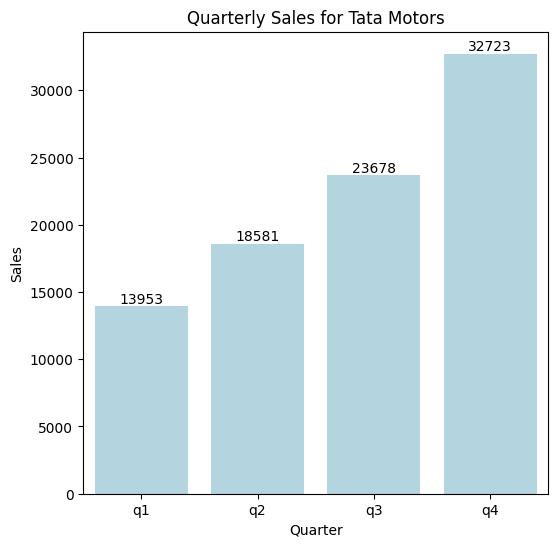

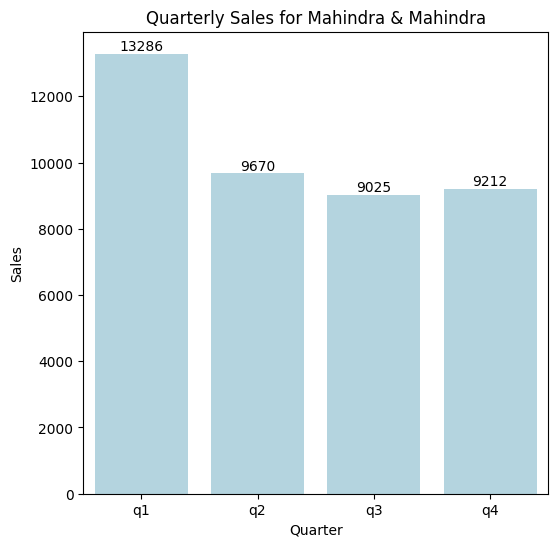

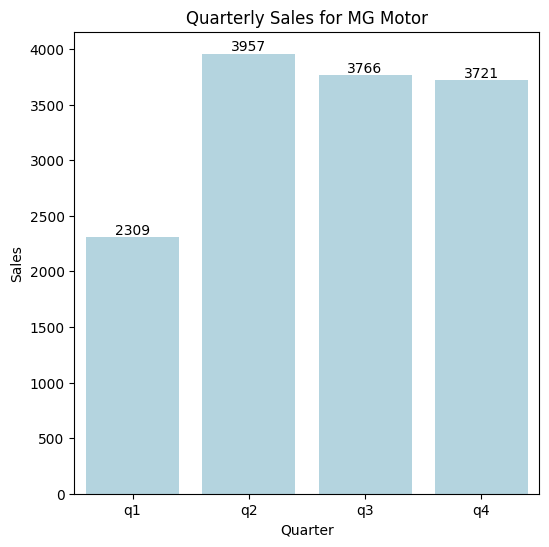

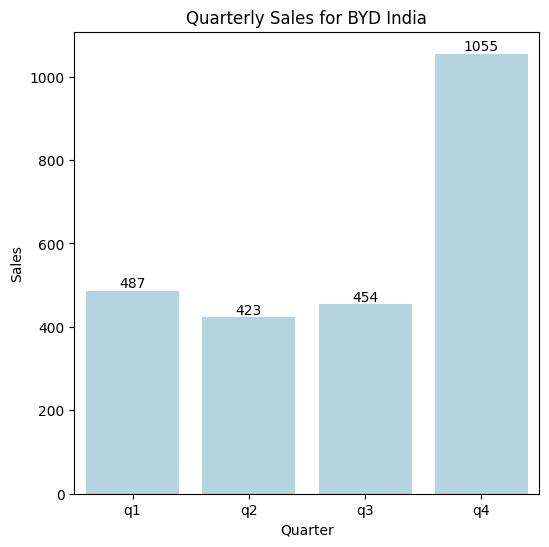

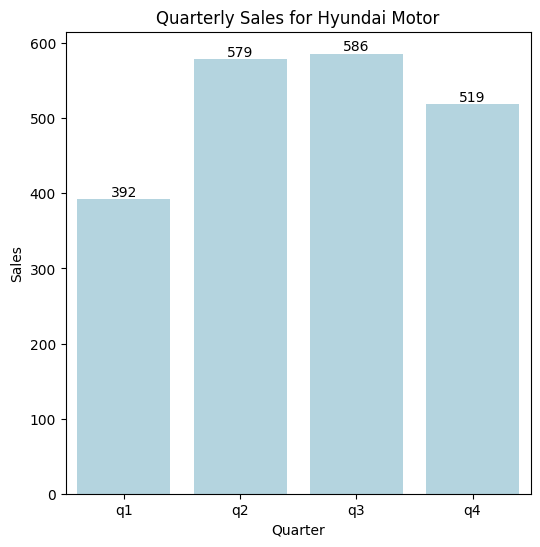

In [42]:
manufacturers = ["Tata Motors", "Mahindra & Mahindra", "MG Motor", "BYD India", "Hyundai Motor"]

for i in manufacturers:
    plt.figure(figsize=(6, 6))

    ax = sns.barplot(data=d2, y=i, x="Quarter", color="lightblue")
    ax.bar_label(ax.containers[0])

    plt.title(f"Quarterly Sales for {i}")
    plt.xlabel("Quarter")
    plt.ylabel("Sales")
    plt.show()

# 5.The penetration rates of EV sales in Delhi compare to Karnataka for 2024

In [43]:
df3.head(3)

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,2022,Q1,Sikkim,2-Wheelers,0,398
1,01-Apr-21,2022,Q1,Sikkim,4-Wheelers,0,361
2,01-Apr-21,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515


In [44]:
df3=df3[df3["fiscal_year"]==2024]#2024 year only

In [45]:
df=df3.groupby("state")[["electric_vehicles_sold","total_vehicles_sold"]].sum().reset_index()
df["penetration rate"]=df["electric_vehicles_sold"]/df["total_vehicles_sold"]

In [46]:
df=df[df["state"].isin(["Delhi","Karnataka"])]#only delhi and karnataka states

In [47]:
df.reset_index(drop=True)

,state,electric_vehicles_sold,total_vehicles_sold,penetration rate
0,Delhi,46724,606348,0.077058
1,Karnataka,160989,1581988,0.101764


### EV sales in  Delhi compare to Karnataka for 2024

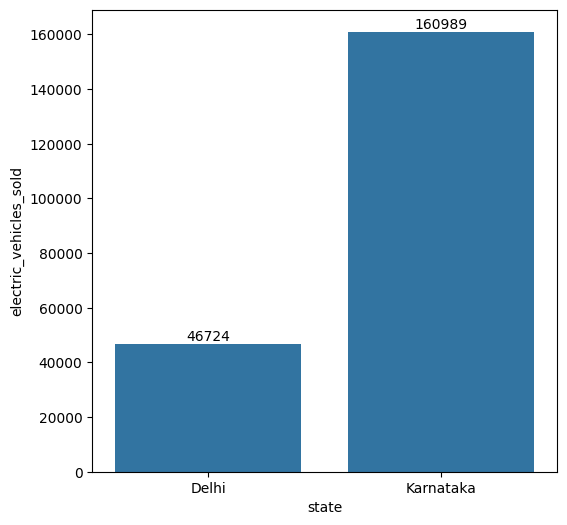

In [48]:
plt.figure(figsize=(6,6))
ax=sns.barplot(data=df,y="electric_vehicles_sold",x="state")
ax.bar_label(ax.containers[0])
plt.show()

### Penetration rates in Delhi compare to Karnataka for 2024

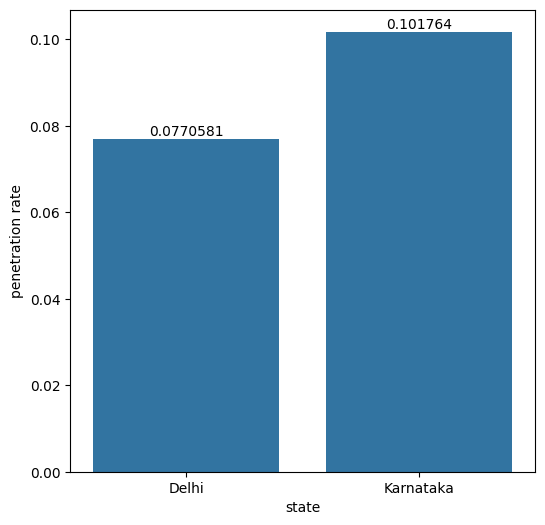

In [49]:
plt.figure(figsize=(6,6))
ax=sns.barplot(data=df,y="penetration rate",x="state")
ax.bar_label(ax.containers[0])
plt.show()

# 6.List of the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

compound Annual Growth Rate (CAGR): CAGR measures the mean annual growth rate over a specified period longer than one year. It is calculated as:
		CAGR = [(Ending Value / Beginning Value) ** 1/n] -1


In [50]:
df=pd.merge(df1,df2,on="date",how="outer")


In [51]:
df=df[df["vehicle_category"]=="4-Wheelers"]

In [52]:
df=df[df["fiscal_year"].isin([2022,2024])]

In [53]:
df=df.groupby(["fiscal_year","maker"])["electric_vehicles_sold"].sum()

In [54]:
df=df.reset_index()

In [55]:

df1=df[df["fiscal_year"]==2022]

In [56]:
df2=df[df["fiscal_year"]==2024]

In [57]:
df=pd.merge(df1,df2,on="maker",how="outer")
df

,fiscal_year_x,maker,electric_vehicles_sold_x,fiscal_year_y,electric_vehicles_sold_y
0,2022,BMW India,7,2024,1078
1,2022,BYD India,33,2024,1466
2,2022,Hyundai Motor,110,2024,1390
3,2022,KIA Motors,0,2024,328
4,2022,MG Motor,1647,2024,8829
5,2022,Mahindra & Mahindra,4042,2024,23346
6,2022,Mercedes -Benz AG,26,2024,291
7,2022,PCA Automobiles,0,2024,1533
8,2022,Tata Motors,12708,2024,48181
9,2022,Volvo Auto India,4,2024,459


In [58]:
df.iloc[:,2:3]=df.iloc[:,2:3].replace(0,1)

In [59]:
df["CAGR"] = ((df["electric_vehicles_sold_y"] /df["electric_vehicles_sold_x"]) ** 1/2) -1

In [60]:
df_sorted=df.sort_values(by="CAGR",ascending=False).head(5)

df_sorted

,fiscal_year_x,maker,electric_vehicles_sold_x,fiscal_year_y,electric_vehicles_sold_y,CAGR
7,2022,PCA Automobiles,1,2024,1533,765.500000
3,2022,KIA Motors,1,2024,328,163.000000
0,2022,BMW India,7,2024,1078,76.000000
9,2022,Volvo Auto India,4,2024,459,56.375000
1,2022,BYD India,33,2024,1466,21.212121


### List of the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

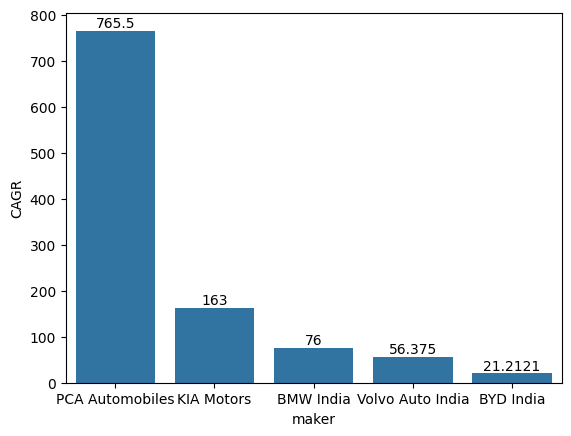

In [61]:
ax=sns.barplot(data=df_sorted,x="maker",y="CAGR")
ax.bar_label(ax.containers[0])
plt.show()

# 7.List of the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [64]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/dim_date.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_makers.csv")
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_state.csv")

In [65]:
df=pd.merge(df1,df3,on="date",how="outer")


In [66]:
df=df[df["fiscal_year"].isin([2022,2024])]


In [67]:
df=df.groupby(["fiscal_year","state"])["total_vehicles_sold"].sum()
df=df.reset_index()


In [68]:
df1=df[df["fiscal_year"]==2022]
df2=df[df["fiscal_year"]==2024]

In [69]:
df=pd.merge(df1,df2,on="state",how="outer")
df.iloc[:,2:3]=df.iloc[:,2:3].replace(0,1)

In [70]:
df.isna().sum()

,0
fiscal_year_x,1
state,0
total_vehicles_sold_x,1
fiscal_year_y,0
total_vehicles_sold_y,0


In [71]:
df=df.dropna()#dropping null values

In [72]:
df.isna().sum()

,0
fiscal_year_x,0
state,0
total_vehicles_sold_x,0
fiscal_year_y,0
total_vehicles_sold_y,0


In [73]:
df.head(2)

,fiscal_year_x,state,total_vehicles_sold_x,fiscal_year_y,total_vehicles_sold_y
1,2022.0,Andaman & Nicobar Island,5148.0,2024,6543
2,2022.0,Andhra Pradesh,772748.0,2024,782865


In [74]:
df["CAGR"] = ((df["total_vehicles_sold_y"] /df["total_vehicles_sold_x"]) ** 1/2) -1

In [75]:
df_sorted=df.sort_values(by="CAGR",ascending=False).head(10)

df_sorted

,fiscal_year_x,state,total_vehicles_sold_x,fiscal_year_y,total_vehicles_sold_y,CAGR
22,2022.0,Meghalaya,22193.0,2024,36628,-0.174785
10,2022.0,Goa,48372.0,2024,78524,-0.188332
16,2022.0,Karnataka,1007894.0,2024,1581988,-0.215201
9,2022.0,Delhi,401540.0,2024,606348,-0.244972
28,2022.0,Rajasthan,880985.0,2024,1300476,-0.261919
11,2022.0,Gujarat,1094872.0,2024,1590987,-0.273437
4,2022.0,Assam,379450.0,2024,547626,-0.278395
23,2022.0,Mizoram,19439.0,2024,27422,-0.294665
3,2022.0,Arunachal Pradesh,19929.0,2024,27892,-0.300216
12,2022.0,Haryana,528591.0,2024,732029,-0.307566


### List of the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

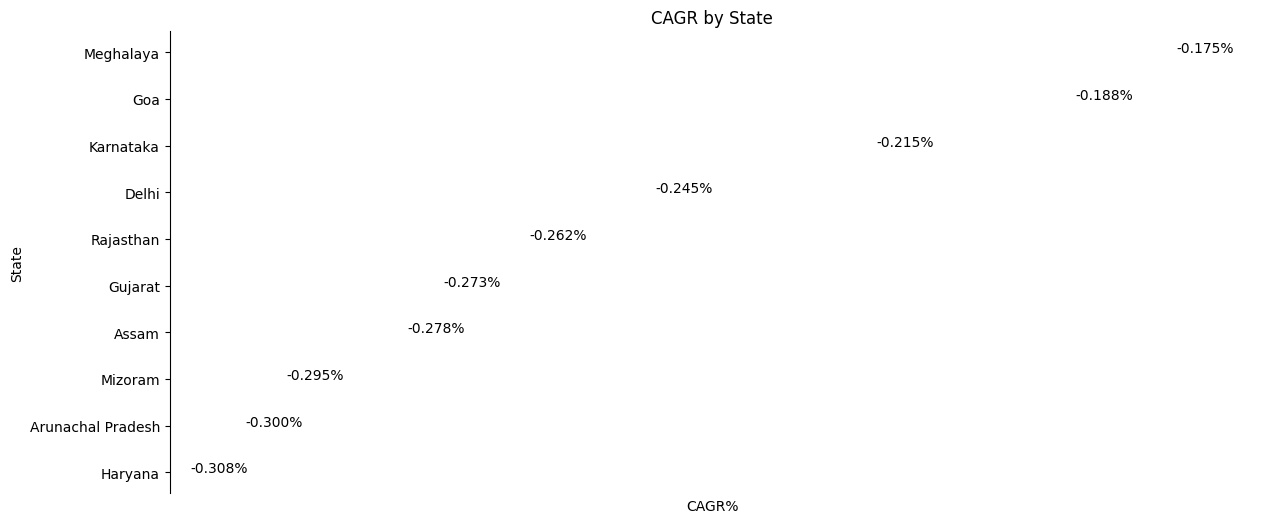

In [76]:

# Scatter plot of CAGR vs. State
plt.figure(figsize=(14,6))  # Set figure size

ax = sns.scatterplot(data=df_sorted, x="CAGR", y="state",color="white")


# Add text labels
for i in range(len(df_sorted)):
    ax.text(df_sorted["CAGR"].iloc[i], df_sorted["state"].iloc[i], f"{df_sorted['CAGR'].iloc[i]:.3f}%", ha="center", fontsize=10)


# Add labels and title
plt.xlabel("CAGR%")
ax.set_xticks([])
plt.ylabel("State")
plt.title("CAGR by State")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.show()


# 8.The peak and low season months for EV sales based on the data from 2022 to 2024

In [77]:
df3.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [78]:
df3["Month"] = df3["date"].str.extract("([a-zA-Z]+)")

In [79]:
df3.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,Month
0,01-Apr-21,Sikkim,2-Wheelers,0,398,Apr
1,01-Apr-21,Sikkim,4-Wheelers,0,361,Apr
2,01-May-21,Sikkim,2-Wheelers,0,113,May
3,01-May-21,Sikkim,4-Wheelers,0,98,May
4,01-Jun-21,Sikkim,2-Wheelers,0,229,Jun


###The peak season months for EV sales based on the data from 2022 to 2024

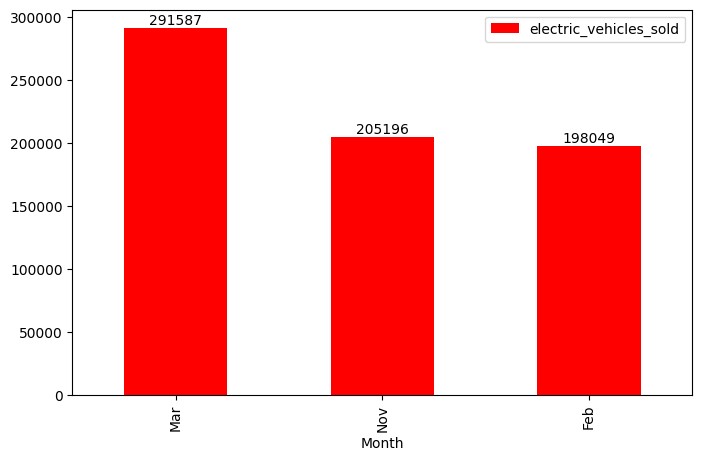

In [80]:
ax=df3.groupby("Month")["electric_vehicles_sold"].sum().reset_index().sort_values(by="electric_vehicles_sold",ascending=False).head(3).plot(kind="bar",x="Month",figsize=(8,5),color="red")
ax.bar_label(ax.containers[0])
plt.show()

###The low season months for EV sales based on the data from 2022 to 2024

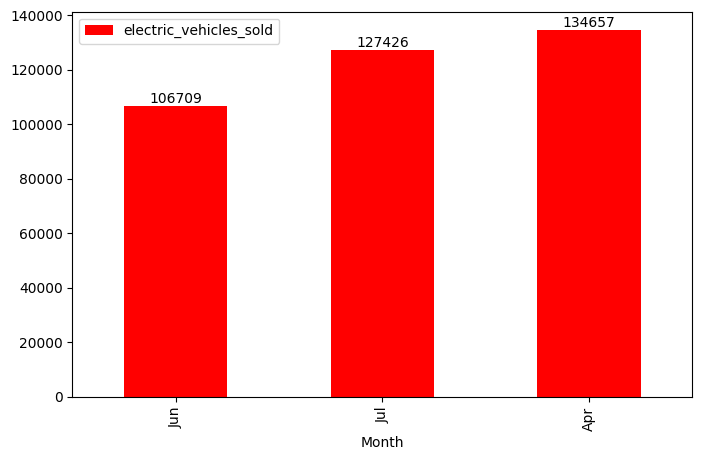

In [81]:
ax=df3.groupby("Month")["electric_vehicles_sold"].sum().reset_index().sort_values(by="electric_vehicles_sold",ascending=True).head(3).plot(kind="bar",x="Month",figsize=(8,5),color="red")
ax.bar_label(ax.containers[0])
plt.show()

#9.What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [87]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/dim_date.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_makers.csv")
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_state.csv")

In [88]:
df3=pd.merge(df1,df3,on="date",how="outer")

In [89]:
df_ev=df3.groupby("state")[["electric_vehicles_sold","total_vehicles_sold"]].sum().reset_index()

In [90]:
df_ev["penetration rate"]=df_ev["electric_vehicles_sold"]/df_ev["total_vehicles_sold"]

### Top 10 states by penetration rate

In [91]:
df_1=df_ev.sort_values(by="penetration rate",ascending=False).head(10)[["state","penetration rate"]].reset_index(drop=True)

In [92]:
df_1.head()

,state,penetration rate
0,Goa,0.098435
1,Karnataka,0.078360
2,Delhi,0.067558
3,Kerala,0.066383
4,Maharashtra,0.064910


In [93]:
df=df3[df3["fiscal_year"].isin([2022,2024])]


In [94]:
df=df.groupby(["fiscal_year","state"])["total_vehicles_sold"].sum()
df=df.reset_index()


In [95]:
df1=df[df["fiscal_year"]==2022]
df2=df[df["fiscal_year"]==2024]

In [96]:
df=pd.merge(df1,df2,on="state",how="outer")
df.iloc[:,2:3]=df.iloc[:,2:3].replace(0,1)

In [97]:
df.isna().sum()

,0
fiscal_year_x,1
state,0
total_vehicles_sold_x,1
fiscal_year_y,0
total_vehicles_sold_y,0


In [98]:
df=df.dropna()#dropping null values

In [99]:
df.isna().sum()

,0
fiscal_year_x,0
state,0
total_vehicles_sold_x,0
fiscal_year_y,0
total_vehicles_sold_y,0


### compounded annual growth rate (CAGR) from previous years  [2022-2024]

In [100]:
df["CAGR"] = ((df["total_vehicles_sold_y"] / df["total_vehicles_sold_x"]) ** (1/2)) - 1


In [101]:
df_2=df[["CAGR","state"]]

In [102]:
df_2.head()

,CAGR,state
1,0.127377,Andaman & Nicobar Island
2,0.006525,Andhra Pradesh
3,0.183034,Arunachal Pradesh
4,0.201337,Assam
5,0.126324,Bihar


In [103]:
df_0=pd.merge(df_1,df_2,on="state",how="outer")

In [104]:
df_0.dropna(inplace=True)

In [105]:
df_12=df_0.sort_values(by="penetration rate",ascending=False).reset_index(drop=True)

In [106]:
df_12

,state,penetration rate,CAGR
0,Goa,0.098435,0.274102
1,Karnataka,0.078360,0.252836
2,Delhi,0.067558,0.228843
3,Kerala,0.066383,-0.038037
4,Maharashtra,0.064910,0.173081
5,Odisha,0.046345,0.135377
6,Rajasthan,0.045461,0.214974
7,Gujarat,0.043967,0.205457
8,Tamil Nadu,0.043002,0.129831
9,Chandigarh,0.040412,0.105309


In [107]:
df3=df3[df3["fiscal_year"]==2024]
df3.head()

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
136,01-Apr-23,2024,Q1,Sikkim,2-Wheelers,0,465
137,01-Apr-23,2024,Q1,Sikkim,4-Wheelers,0,439
138,01-Apr-23,2024,Q1,Andaman & Nicobar Island,2-Wheelers,0,325
139,01-Apr-23,2024,Q1,Arunachal Pradesh,2-Wheelers,0,971
140,01-Apr-23,2024,Q1,Ladakh,2-Wheelers,0,43


In [108]:
df_pred=pd.merge(df_12,df3.groupby("state")[["electric_vehicles_sold"]].sum().reset_index(),on="state",how="outer")

In [109]:
df_pred.dropna(inplace=True)
df_pred.sort_values(by="penetration rate",ascending=False)

,state,penetration rate,CAGR,electric_vehicles_sold
10,Goa,0.098435,0.274102,10799
16,Karnataka,0.078360,0.252836,160989
9,Delhi,0.067558,0.228843,46724
17,Kerala,0.066383,-0.038037,73938
20,Maharashtra,0.064910,0.173081,197169
25,Odisha,0.046345,0.135377,39118
28,Rajasthan,0.045461,0.214974,66444
11,Gujarat,0.043967,0.205457,84359
30,Tamil Nadu,0.043002,0.129831,94314
6,Chandigarh,0.040412,0.105309,2877


In [110]:
df_pred["Projected EV sales in 2030"] = round(df_pred["electric_vehicles_sold"] * ((1 + df_pred["CAGR"] / 100) ** 6))


###Projected number of EV sales in 2030 for the top 10 states by penetration rate

In [111]:
df_pred=df_pred.rename(columns={"electric_vehicles_sold":"electric_vehicles_sold 2024"})
df_pred=df_pred.sort_values(by="Projected EV sales in 2030",ascending=False)

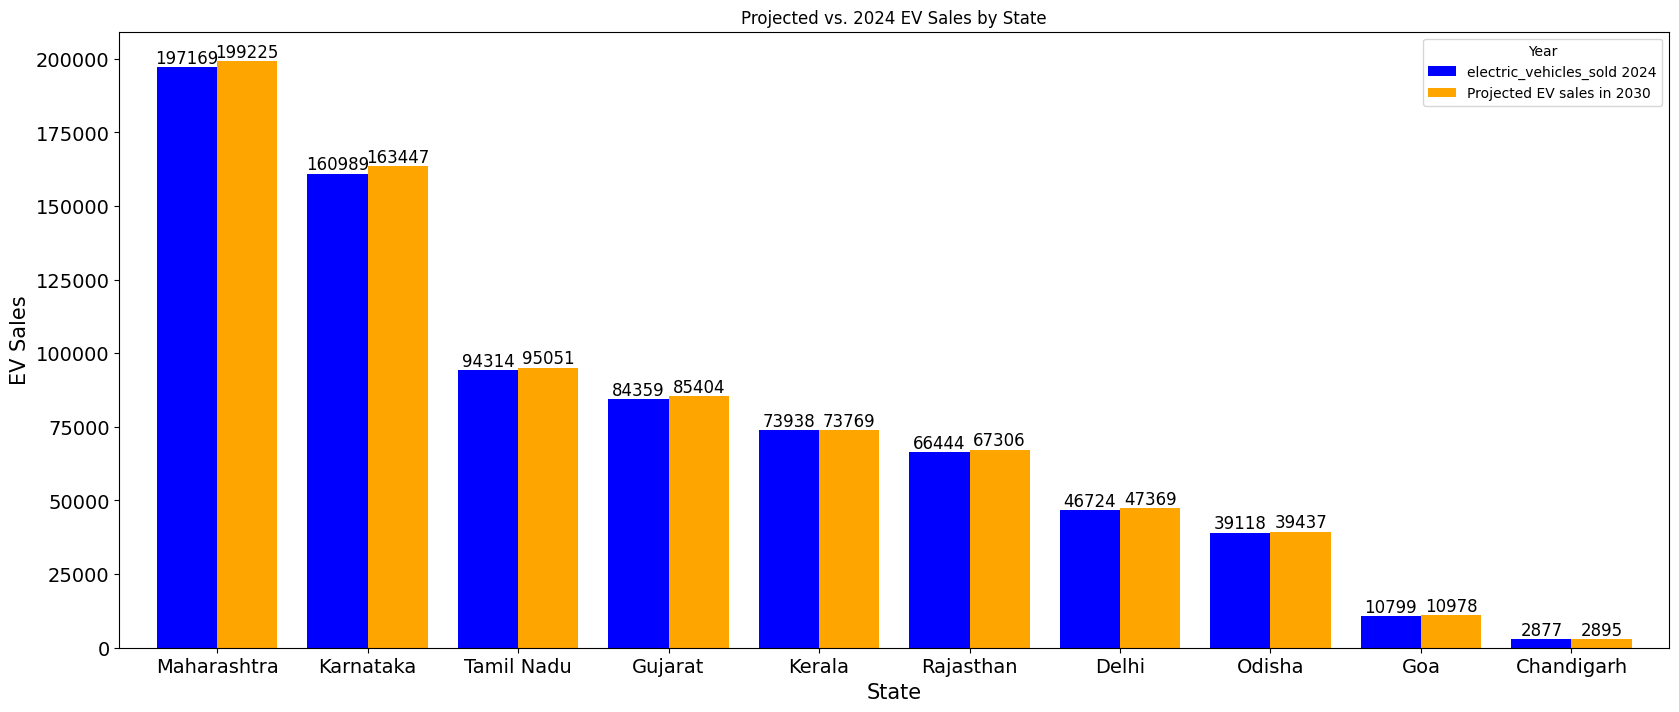

In [112]:
df_pred=df_pred[["state","electric_vehicles_sold 2024","Projected EV sales in 2030"]]
ax=df_pred.set_index("state").plot(kind="bar", figsize=(20,8), color=["blue", "orange"],width=0.8)
for container in ax.containers:
    ax.bar_label(container,fontsize=12, fmt="%.0f")
plt.xlabel("State",fontsize=15)
plt.ylabel("EV Sales",fontsize=15)
plt.title("Projected vs. 2024 EV Sales by State")
plt.legend(title="Year")
plt.yticks(fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.show()

# 10.Estimatiom of  the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price

In [217]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/dim_date.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_makers.csv")
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EV-Project/electric_vehicle_sales_by_state.csv")

In [218]:
df_1=pd.merge(df1,df3,on="date",how="outer")

In [219]:
df_22=df_1[df_1["fiscal_year"]==2022]
df_23=df_1[df_1["fiscal_year"]==2023]
df_24=df_1[df_1["fiscal_year"]==2024]

Assuming an average unit price

2-Wheelers = 85000

4-Wheelers = 1500000

In [220]:
df_22=df_22.groupby("vehicle_category")["electric_vehicles_sold"].sum().reset_index()
df_22.loc[0,["revenue"]]=df_22["electric_vehicles_sold"][0]*85000
df_22.loc[1,["revenue"]]=df_22["electric_vehicles_sold"][1]*1500000
df_23=df_23.groupby("vehicle_category")["electric_vehicles_sold"].sum().reset_index()
df_23.loc[0,["revenue"]]=df_23["electric_vehicles_sold"][0]*85000
df_23.loc[1,["revenue"]]=df_23["electric_vehicles_sold"][1]*1500000
df_24=df_24.groupby("vehicle_category")["electric_vehicles_sold"].sum().reset_index()
df_24.loc[0,["revenue"]]=df_24["electric_vehicles_sold"][0]*85000
df_24.loc[1,["revenue"]]=df_24["electric_vehicles_sold"][1]*1500000
df=pd.merge(df_22,df_23,on="vehicle_category",how="outer")
df=pd.merge(df,df_24,on="vehicle_category",how="outer")

In [221]:
df.rename(columns={"revenue_x":"revenue_22","revenue_y":"revenue_23","revenue":"revenue_24"},inplace=True)

In [222]:
df.drop(columns=["electric_vehicles_sold_x","electric_vehicles_sold_y","electric_vehicles_sold"],inplace=True)

In [225]:
df

,vehicle_category,revenue_22,revenue_23,revenue_24
0,2-Wheelers,2.146870e+10,6.187176e+10,7.927882e+10
1,4-Wheelers,2.786550e+10,7.119750e+10,1.303515e+11


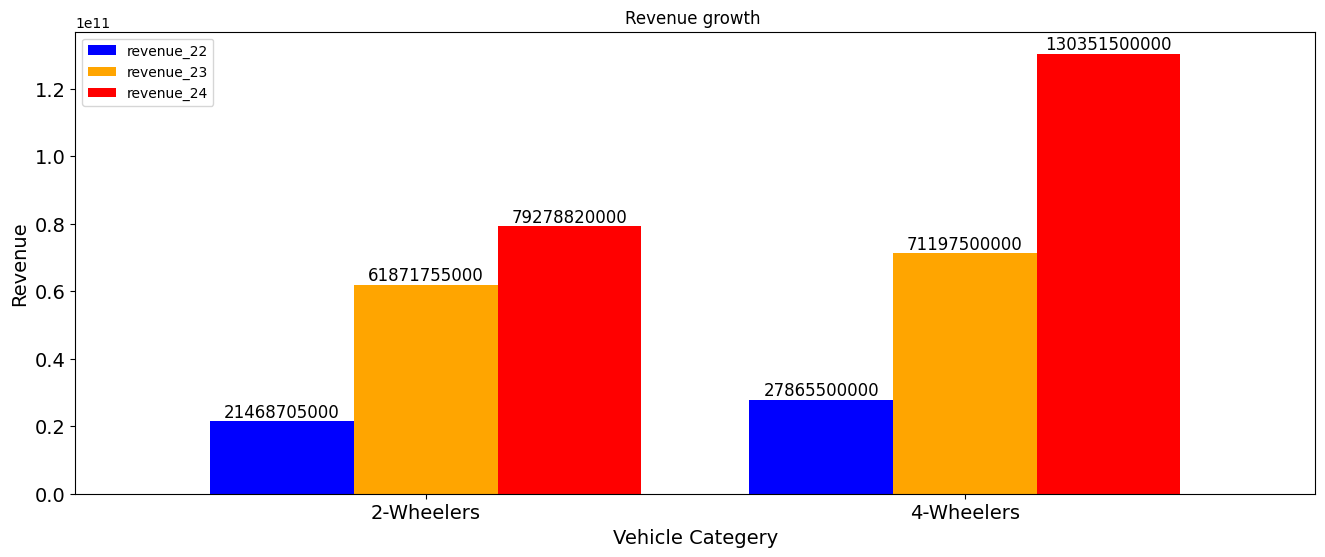

In [227]:
ax=df.set_index("vehicle_category").plot(kind="bar", figsize=(16,6), color=["blue", "orange","red"],width=0.8)
for container in ax.containers:
    ax.bar_label(container,fontsize=12, fmt="%.0f")
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Vehicle Categery",fontsize=14)
plt.ylabel("Revenue",fontsize=14)
plt.title("Revenue growth ")
plt.show()

### Revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024

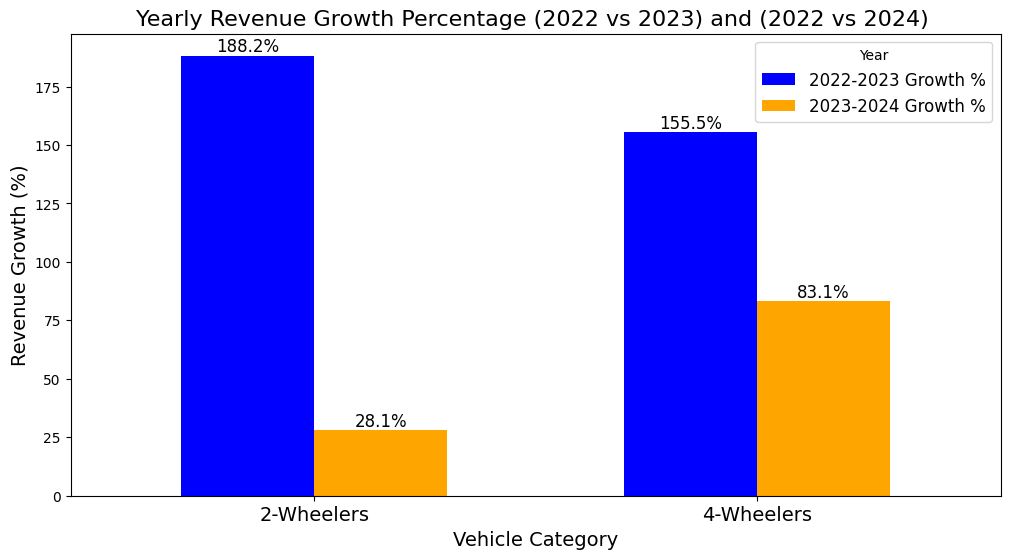

In [228]:
df["Growth_23"] = ((df["revenue_23"] - df["revenue_22"]) / df["revenue_22"]) * 100
df["Growth_24"] = ((df["revenue_24"] - df["revenue_23"]) / df["revenue_23"]) * 100


df = df.rename(columns={"Growth_23": "2022-2023 Growth %", "Growth_24": "2023-2024 Growth %"})

df_percentage = df[["vehicle_category", "2022-2023 Growth %", "2023-2024 Growth %"]]

ax = df_percentage.set_index("vehicle_category").plot(kind="bar", figsize=(12,6), color=["blue", "orange"], width=0.6)


for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=12)
plt.xlabel("Vehicle Category", fontsize=14)
plt.ylabel("Revenue Growth (%)", fontsize=14)
plt.title("Yearly Revenue Growth Percentage (2022 vs 2023) and (2022 vs 2024) ", fontsize=16)
plt.legend(title="Year", fontsize=12)
plt.xticks(rotation=0, fontsize=14)
plt.show()